# Wiring diagrams in TikZ


Catlab can draw morphism expressions as TikZ pictures. To use this feature,
you must import the [TikzPictures.jl](https://github.com/sisl/TikzPictures.jl)
package before loading `Catlab.Graphics`.

In [1]:
import TikzPictures
using Catlab.Graphics

### Symmetric monoidal category

In [2]:
using Catlab.Doctrines

A, B = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

In [3]:
to_tikz(f; arrowtip="Stealth", labels=true)

In [4]:
to_tikz(compose(f,g); arrowtip="Stealth", labels=true)

In [5]:
comp1 = compose(otimes(g,f), h, otimes(f,g))

compose(otimes(g,f),h,otimes(f,g))

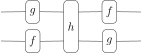

In [6]:
to_tikz(comp1)

In [7]:
comp2 = compose(otimes(id(A),f), h, otimes(id(A),g))

compose(otimes(id(A),f),h,otimes(id(A),g))

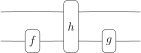

In [8]:
to_tikz(comp2)

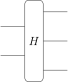

In [9]:
to_tikz(Hom(:H, otimes(A,A), otimes(B,B,B)))

In [10]:
twist = compose(braid(A,A), otimes(f,f), braid(B,B))

compose(braid(A,A),otimes(f,f),braid(B,B))

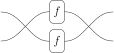

In [11]:
to_tikz(twist)

### Biproduct category

In [12]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A);

In [13]:
split = compose(mcopy(A), otimes(f,f))

compose(mcopy(A),otimes(f,f))

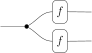

In [14]:
to_tikz(split)

In [15]:
combine = compose(split, mmerge(B))

compose(mcopy(A),otimes(f,f),mmerge(B))

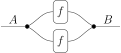

In [16]:
to_tikz(combine, labels=true)

In [17]:
to_tikz(compose(create(A), f, g, delete(A)))

### Compact closed category

In [18]:
A, B = Ob(FreeCompactClosedCategory, :A, :B)
f = Hom(:f, A, B)
g = Hom(:g, B, A)
h = Hom(:h, otimes(A,B), otimes(A,B));

In [19]:
to_tikz(dcounit(A); arrowtip="Stealth", labels=true)

In [20]:
to_tikz(dunit(A); arrowtip="Stealth", labels=true)

In [21]:
transpose = compose(
  otimes(dunit(A), id(dual(B))),
  otimes(id(dual(A)), f, id(dual(B))),
  otimes(id(dual(A)), dcounit(B)),
)

compose(otimes(dunit(A),id(dual(B))),otimes(id(dual(A)),f,id(dual(B))),otimes(id(dual(A)),dcounit(B)))

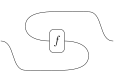

In [22]:
to_tikz(transpose)

In [23]:
trace = compose(
  f,
  otimes(dunit(A), id(B)),
  otimes(id(dual(A)), h),
  otimes(braid(dual(A),A), id(B)),
  otimes(dcounit(A), id(B)),
  g
)

compose(f,otimes(dunit(A),id(B)),otimes(id(dual(A)),h),otimes(braid(dual(A),A),id(B)),otimes(dcounit(A),id(B)),g)

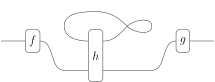

In [24]:
to_tikz(trace)